In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import chi2_contingency
print("hello")

hello


In [3]:
sns.set_style("whitegrid")
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balax\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\balax\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [4]:
links=["https://www.federalreserve.gov/newsevents/pressreleases/monetary20220126a.htm",
                  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20220615a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20060510a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20070810a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20191011a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20100509a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20080311a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20220504a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20220316a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20230201a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20221214a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20221102a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20220921a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20220727a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20230726a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20230614a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20230503a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20230322a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20210428a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20210317a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20210127a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20211215a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20211103a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20210922a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20210728a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20210616a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20200429a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20200323a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20200315a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20200303a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20200129a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20200729a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20200610a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20201216a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20201105a.htm",
    "https://www.federalreserve.gov/newsevents/pressreleases/monetary20200916a.htm",
          "https://www.federalreserve.gov/newsevents/pressreleases/monetary20190731a.htm",
          "https://www.federalreserve.gov/newsevents/pressreleases/monetary20190918a.htm",
          "https://www.federalreserve.gov/newsevents/pressreleases/monetary20191030a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20191211a.htm",
          "https://www.federalreserve.gov/newsevents/pressreleases/monetary20190619a.htm",
          "https://www.federalreserve.gov/newsevents/pressreleases/monetary20190501a.htm",
          "https://www.federalreserve.gov/newsevents/pressreleases/monetary20190130a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20190320a.htm",
          "https://www.federalreserve.gov/newsevents/pressreleases/monetary20180131a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20180321a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20180502a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20180613a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20180801a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20180926a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20181108a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20181219a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20170201a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20170315a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20170503a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20170614a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20170726a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20170920a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20171101a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20171213a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20160127a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20160316a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20160427a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20160615a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20160727a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20160921a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20161102a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20161214a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20150128a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20150318a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20150429a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20150617a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20150729a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20150917a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20151028a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20151216a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20140129a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20140319a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20140430a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20140618a.htm", 
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20140730a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20140917a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20141029a.htm",  
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20141217a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20130130a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20130320a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20130501a.htm", 
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20130619a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20130731a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20130918a.htm",  
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20131030a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20131218a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20120125a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20120313a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20120425a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20120620a.htm", 
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20120801a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20120913a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20121024a.htm",  
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20121212a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20110126a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20110315a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20110427a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20110622a.htm", 
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20110809a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20110921a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20111102a.htm",  
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20111213a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20100127a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20100316a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20100428a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20100623a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20100810a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20100921a.htm",  
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20101103a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20101214a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20090128a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20090318a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20090429a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20090624a.htm", 
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20090812a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20090923a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20091104a.htm",  
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20091216a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20080122b.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20080130a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20080318a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20080430a.htm", 
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20080625a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20080805a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20080916a.htm",  
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20081008a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20081029a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20081216b.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20070131a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20070321a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20070509a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20070618a.htm", 
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20070807a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20070817b.htm",  
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20070918a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20071031a.htm",
         "https://www.federalreserve.gov/newsevents/pressreleases/monetary20071211a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20060629a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20060808a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20060920a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20061025a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20061212a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20060131a.htm",
  "https://www.federalreserve.gov/newsevents/pressreleases/monetary20060328a.htm",
]

In [5]:
records = []
for url in links:
    # 1) Extract the first 8-digit sequence (YYYYMMDD) from the URL
    m = re.search(r"(\d{8})", url)
    if not m:
        raise ValueError(f"No 8-digit date found in URL: {url}")
    date_str = m.group(1)       # e.g. "20220126"
    year     = date_str[:4]     # e.g. "2022"

    # 2) Fetch the page and parse its <p> tags
    resp = requests.get(url)
    resp.raise_for_status()
    soup = BeautifulSoup(resp.content, "html.parser")
    paras = [p.get_text(strip=True) for p in soup.find_all("p")]

    # 3) Find the first paragraph containing “release” and use everything after up to the next-to-last
    idx = next((i for i, txt in enumerate(paras) if "release" in txt.lower()), None)
    if idx is not None and len(paras) > idx+1:
        body = " ".join(paras[idx+1:-1])
    else:
        # fallback: join all paras
        body = " ".join(paras)

    # 4) Clean up whitespace
    body = re.sub(r"\s+", " ", body).strip()

    records.append({
        "year": year,
        "statement.dates": date_str,
        "links": url,
        "statement.content": body,
        "statement.length": len(body)
    })


In [7]:
df = pd.DataFrame(records)
df

,year,statement.dates,links,statement.content,statement.length
0,2022,20220126,https://www.federalreserve.gov/newsevents/pres...,Indicators of economic activity and employment...,2855
1,2022,20220615,https://www.federalreserve.gov/newsevents/pres...,Overall economic activity appears to have pick...,2494
2,2006,20060510,https://www.federalreserve.gov/newsevents/pres...,The Federal Open Market Committee decided toda...,1896
3,2007,20070810,https://www.federalreserve.gov/newsevents/pres...,The Federal Reserve is providing liquidity to ...,574
4,2019,20191011,https://www.federalreserve.gov/newsevents/pres...,Consistent with its January 2019 Statement Reg...,4050
...,...,...,...,...,...
145,2006,20060920,https://www.federalreserve.gov/newsevents/pres...,The Federal Open Market Committee decided toda...,1370
146,2006,20061025,https://www.federalreserve.gov/newsevents/pres...,The Federal Open Market Committee decided toda...,1387
147,2006,20061212,https://www.federalreserve.gov/newsevents/pres...,The Federal Open Market Committee decided toda...,1460
148,2006,20060131,https://www.federalreserve.gov/newsevents/pres...,The Federal Open Market Committee decided toda...,1450


In [8]:
df.loc[df["statement.dates"]=="20070618", "statement.dates"] = "20070628"

In [9]:
df.to_csv("2.reports-in_sim.csv", index=False, encoding="utf-8")
print(f"Saved {len(df)} statements to 2.reports-in.csv")

Saved 150 statements to 2.reports-in.csv


C:\Users\balax\AppData\Local\Temp\ipykernel_5092\2451409516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="words.per.year", y="year", data=yearly, palette="Blues_r")


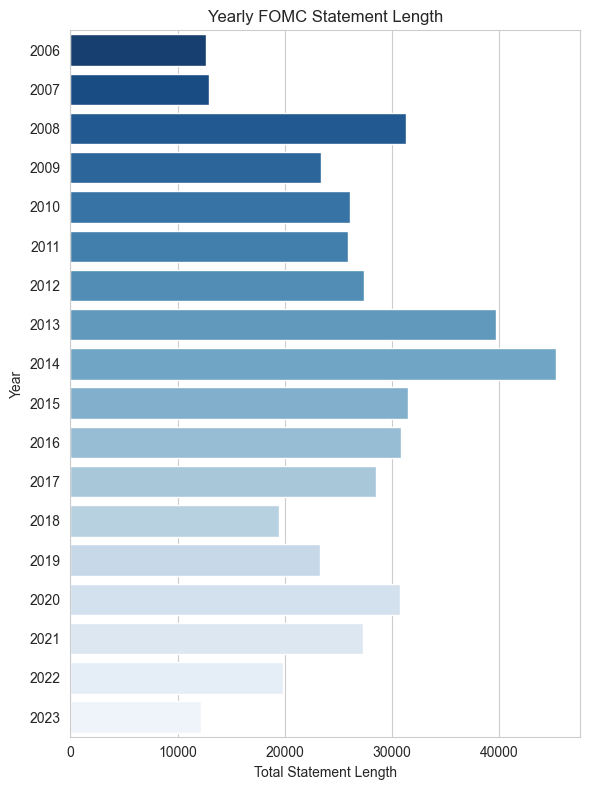

In [10]:
yearly = df.groupby("year")["statement.length"].sum().reset_index(name="words.per.year")
plt.figure(figsize=(6,8))
sns.barplot(x="words.per.year", y="year", data=yearly, palette="Blues_r")
plt.xlabel("Total Statement Length")
plt.ylabel("Year")
plt.title("Yearly FOMC Statement Length")
plt.tight_layout()
plt.savefig("figure_yearly_length.png")

In [11]:
sample = df[df["statement.dates"]=="20220126"]
print("inflation count:", sample["statement.content"].str.count(r"\binflation\b").iloc[0])

inflation count: 6


In [12]:
def tokenize(text):
    # remove non-alpha, lowercase, split
    clean = re.sub(r"[^A-Za-z ]+", " ", text).lower()
    tokens = nltk.word_tokenize(clean)
    # filter stop words & single chars, stem
    return [
        stemmer.stem(w) for w in tokens 
        if w not in stop_words and len(w)>1
    ]

In [13]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\balax\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [14]:
all_rows = []
for _, row in df.iterrows():
    toks = tokenize(row["statement.content"])
    freq = pd.Series(toks).value_counts()
    for word, count in freq.items():
        all_rows.append({
            "date": row["statement.dates"],
            "year": row["year"],
            "word": word,
            "frequency": count
        })

In [18]:
report_words = pd.DataFrame(all_rows)
report_words


,date,year,word,frequency
0,20220126,2022,committe,9
1,20220126,2022,continu,7
2,20220126,2022,inflat,6
3,20220126,2022,month,5
4,20220126,2022,econom,4
...,...,...,...,...
25386,20060328,2006,san,1
25387,20060328,2006,francisco,1
25388,20060328,2006,governorsof,1
25389,20060328,2006,thefeder,1


In [16]:
f_text = (
    report_words
      .groupby(["year","word"])["frequency"]
      .sum()
      .reset_index(name="total")
)

In [17]:
f_text["rank"] = f_text.sort_values(["year","total"], ascending=[True,False]) \
                       .groupby("year") \
                       .cumcount() + 1
top_words = f_text[f_text["rank"]<=10].sort_values(["year","rank"])
top_words.to_csv("2.words_Freq_sim.csv", index=False)


In [ ]:
cls = pd.read_csv("D:\rajaramproj\3.FOMC_Class.csv", dtype={"Date":str})
cls.rename(columns={"Date":"statement.dates"}, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'FOMC_Class_new.csv'

In [50]:
cls.rename(columns={
    "Date":              "statement.dates",
    "Economic Growth":   "Economic.Growth",
    "Employment Growth": "Employment.Growth",
    "Medium Term Rate":  "Medium.Term.Rate",
    "Policy Rate":       "Policy.Rate"
}, inplace=True)

In [51]:
mg = pd.merge(
    df, cls, on="statement.dates", how="inner", suffixes=(None,"")
)

In [52]:
mg["date_mdy"] = pd.to_datetime(mg["statement.dates"], format="%Y%m%d")
mg = mg[[
    "year","statement.dates","links","statement.content","statement.length",
    "date_mdy","Economic.Growth","Employment.Growth","Inflation",
    "Medium.Term.Rate","Policy.Rate"
]]

In [53]:
def cramers_v(x, y):
    conf = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(conf)
    n = conf.sum().sum()
    phi2 = chi2 / n
    r, c = conf.shape
    return np.sqrt(phi2 / min(c-1, r-1))

In [54]:
cats = mg[[
    "Economic.Growth",
    "Employment.Growth",
    "Inflation",
    "Medium.Term.Rate",
    "Policy.Rate"
]]

In [55]:
cv_mat = pd.DataFrame(
    [[cramers_v(cats.iloc[:,i], cats.iloc[:,j]) for j in range(5)]
     for i in range(5)],
    index=cats.columns, columns=cats.columns
)

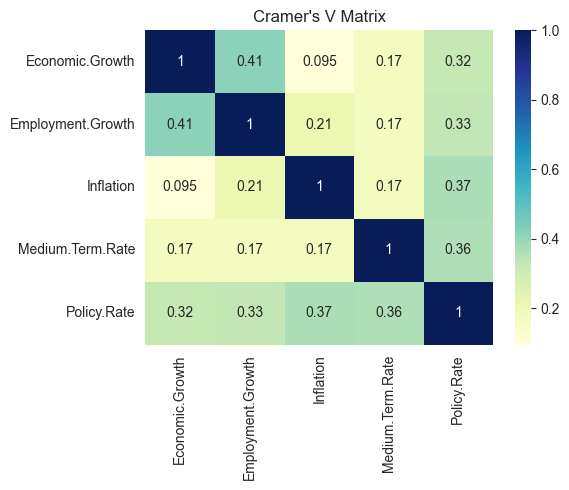

In [56]:
plt.figure(figsize=(6,5))
sns.heatmap(cv_mat, annot=True, cmap="YlGnBu")
plt.title("Cramer's V Matrix")
plt.tight_layout()
plt.savefig("figure8_cramers_v.png")

In [57]:
# 7. Text‐classification datasets (DTM + response column)
# -----------------------------------------------------------------------------
# build a DTM keeping terms in ≥40% of docs


In [58]:
cv = CountVectorizer(min_df=0.40, tokenizer=tokenize)
X = cv.fit_transform(df["statement.content"].fillna(""))

C:\Users\rajar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [59]:
def build_and_save(label_col, fname):
    y = mg[label_col].str.lower()
    df_mat = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
    df_mat[label_col] = y
    df_mat.to_csv(fname, index=False)

In [60]:
build_and_save("Medium.Term.Rate", "mRateData.csv")
build_and_save("Economic.Growth",   "EcoData.csv")
build_and_save("Inflation",         "EInflaData.csv")
build_and_save("Employment.Growth", "EmpData.csv")
build_and_save("Policy.Rate",       "PoData.csv")

In [61]:
sent = pd.read_excel("fomc_final_sheets22.xlsx", dtype=str,engine="openpyxl")
sent

,Year,Date,Statement,Mean Positive,Mean Negative,Mean Neutral,Tone
0,2019,30-01-2019,"Resources for Consumers January 30, 2019 For ...",57.14285714285714,35.71428571428572,7.142857142857142,positive
1,2011,13-12-2011,"Resources for Consumers December 13, 2011 For...",40,53.33333333333334,6.666666666666667,negative
2,2010,10-08-2010,"Resources for Consumers August 10, 2010 For i...",41.66666666666667,16.66666666666666,41.66666666666667,positive
3,2018,21-03-2018,"Resources for Consumers March 21, 2018 For re...",50,45,5,positive
4,2014,29-10-2014,"Resources for Consumers October 29, 2014 For ...",33.33333333333333,54.16666666666666,12.5,negative
...,...,...,...,...,...,...,...
156,2012,20-06-2012,"Resources for Consumers June 20, 2012 For imm...",26.31578947368421,52.63157894736842,21.05263157894737,negative
157,2015,18-03-2015,"Resources for Consumers March 18, 2015 For im...",30.43478260869566,52.17391304347826,17.39130434782609,negative
158,2016,27-04-2016,"Resources for Consumers April 27, 2016 For re...",50,40.90909090909091,9.090909090909092,positive
159,2020,29-04-2020,"Resources for Consumers April 29, 2020 For re...",71.42857142857143,4.761904761904762,23.80952380952381,positive


In [62]:
score_cols = sent.columns[3:6]
sent_scores = sent[score_cols].astype(float).max(axis=1)
ed = pd.DataFrame({
    "Date": sent["Date"],
    "Score": sent_scores,
    "Tone": sent["Tone"]
})
#sent_scores.value_counts()

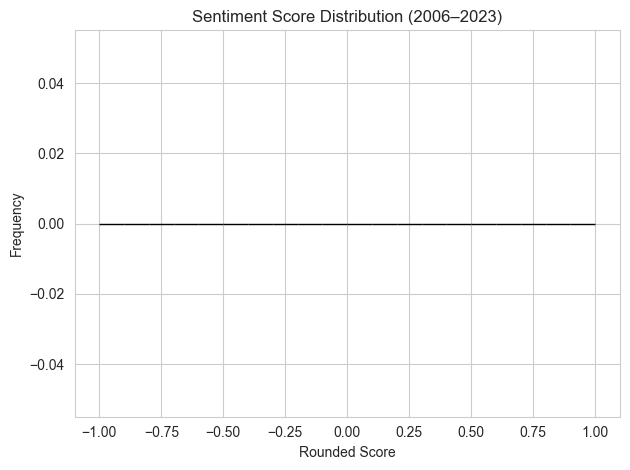

In [63]:
plt.figure()
plt.hist(ed["Score"].round(), bins=np.arange(-1,1.1,0.1), edgecolor="k")
plt.title("Sentiment Score Distribution (2006–2023)")
plt.xlabel("Rounded Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("sentiment_hist.png")

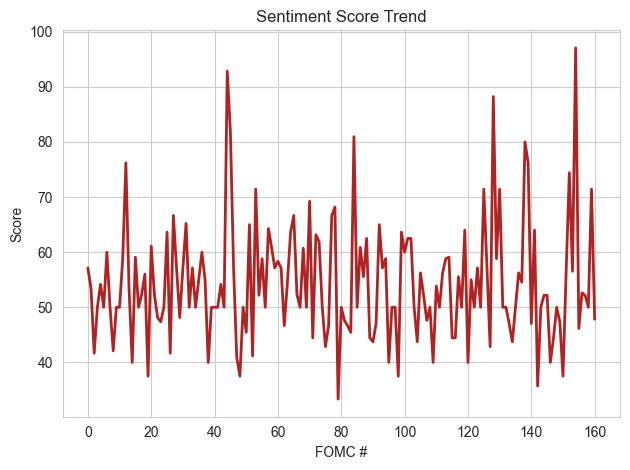

In [64]:
plt.figure()
plt.plot(range(len(ed)), ed["Score"], color="firebrick", lw=2)
plt.title("Sentiment Score Trend")
plt.xlabel("FOMC #")
plt.ylabel("Score")
plt.tight_layout()
plt.savefig("sentiment_trend.png")

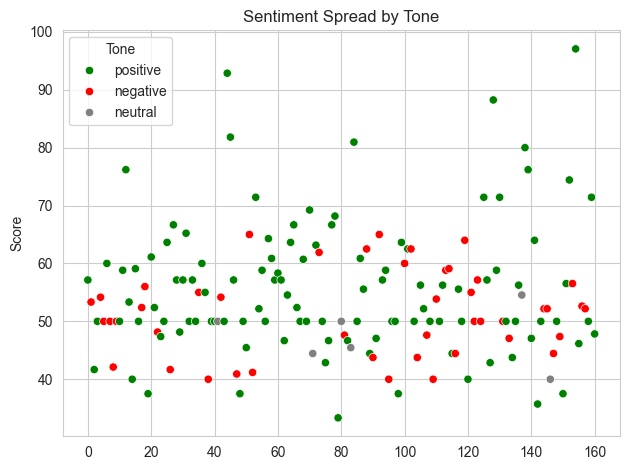

In [65]:
palette = {"negative":"red","neutral":"gray","positive":"green"}
plt.figure()
sns.scatterplot(x=range(len(ed)), y="Score", hue="Tone", data=ed, palette=palette)
plt.title("Sentiment Spread by Tone")
plt.tight_layout()
plt.savefig("sentiment_scatter.png")

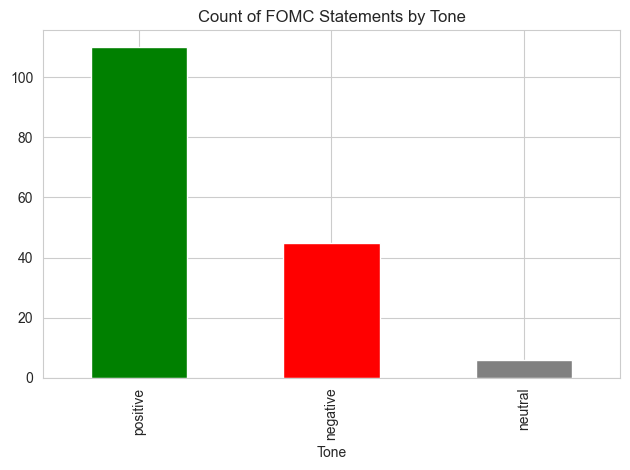

In [66]:
plt.figure()
ed["Tone"].value_counts().plot(kind="bar", color=[palette.get(t,"blue") for t in ed["Tone"].unique()])
plt.title("Count of FOMC Statements by Tone")
plt.tight_layout()
plt.savefig("sentiment_bar.png")